# Project 3 - Supervised Learning and Modeling  

Kelley Breeze



# Introduction  

Start by introducing the idea of supervised learning and describe what the point of using these models is.
You should then discuss the dataset you’ll be using (including where you found it) and the goals/question
you want to answer with your supervised learning models.


In this project we will used supervised learning to build models in order to predict responses from our dataset. Before we get started let's go over a little bit about what supervised learning is, what we want to do with our models, and briefly discuss the dataset that we will be using throughout the project.

### Supervised Learning  
In supervised learning you have a response variable that you are trying to predict. If we fit a predictive model using supervised learning it will be possible to evaluate how well our model predicts the value of our response variable by using observations that were not used in fitting our model.  

### Absenteeism At Work Dataset  

The dataset that we will use contains information about absenteeism at a courier company in Brazil from July 2007 to July 2010. This dataset is from the UC Irvine Machine Learning Repository and can be found [here](https://archive-beta.ics.uci.edu/dataset/445/absenteeism+at+work). It contains 21 variables that are detailed below:  

1.  `ID` - Individual Identification - There are 36 unique employees in the dataset. *This variable will be dropped prior to model building*
2.  `Reason for absence` - **Categorical** - This is the recorded reason for the employee's absence. This is a categorical variable with 28 total levels that has been coded numerically. The values 1-21, corresponding to I through XXI, are taken from the World Health Organization's [International Statistical Classification of Diseases and Related Helth Problems 10 Revision](https://icd.who.int/browse10/2010/en#/). The remaining 7 values of this variable are:  
    -  `22` - patient follow-up  
    -  `23` - medical consultaion  
    -  `24` - blood donation  
    -  `25` - laboratory examination  
    -  `26` - unjustified absence  
    -  `27` - phisiotherapy  
    -  `28` - dental consulation  
    
    Note that there are a total of 43 records for which the `Reason for absence` is recorded as `0`. We will simply refer to these as representing a value of `unkonwn` for our `Reason for absence` variable.  
3.  `Month of absence` - **Categorical** - This is the month in which the absence is registered.  
4.  `Day of the week` - **Categorical** - Work day (Monday through Friday) - Categorical - this is coded numerically with the following values:  
    -  `2` - Monday  
    -  `3` - Tuesday  
    -  `4` - Wednesday  
    -  `5` - Thursday  
    -  `6` - Friday  
5.  `Seasons` - **Categorical** - coded numerically with the following values:  
    -  `1` - summer  
    -  `2` - autumn  
    -  `3` - winter  
    -  `4` - spring  
6. `Transportation expense` - **Numeric** -  This is the monthly transportation expense of each employee in dollars
7. `Distance from Residence to Work` - **Numeric** - This is the distance in kilometers that the employee must travel each day to get to work measured in kilometers.    
8. `Service time`  - **Numeric** - the service time of each employee in years.  
9.  `Age` - **Numeric** - Age of employee in years.  
10. `Work load Average/day` - **Numeric** - This is the average workload per day for the employee, units unknown.  
11. `Hit target` - **Numeric** - This is an achievement percentage for periodic goals for each employee.  
12. `Disciplinary failure (yes=1; no=0)` - **Categorical** - Binary yes/no about whether the employee recieved a disciplinary warning that month.   
13. `Education` - **Categorical/Ordinal** - The highest education level attained by the employee, coded numerically with the following values:  
    -  `1` - high school  
    -  `2` - graduate  
    -  `3` - postgraduate  
    -  `4` - master and doctor  
14. `Son` - **Numeric** - The total number of children of the employee.  
15. `Social drinker` - **Categorical** - This is a binary variable where yes = `1` indicates that the employee is a social drinker and no = `0` indicates that the employee is not a social drinker.  
16. `Social smoker`- **Categorical** - This is a binary variable where yes = `1` indicates that the employee is a social smoker and no = `0` indicates that the employee is not a social smoker.    
17. `Pet` - **Numeric** - This is the number of pets owned by the employee.  
18. `Weight` - ***Numeric** - The employee's weight in kilograms.  
19. `Height` - **Numeric** - The employee's height in centimeters.  
20. `Body mass index` - **Numeric** - The employee's body mass index. *This variable will be dropped as it is highly correlated with weight and height*   
21. `Absenteeism time in hours` - This is our target variable. `Absenteeism time in hours` is a continuous numeric variable representing the number of hours that an employee was absent for a given instance of missed work.  

### Modeling Goals  

Our goal in working with this dataset is to build and test multiple models to predict the number of absentee hours (variable 21) for an employee based on a subset of the available variables (1-20) listed above. We will use five different modeling techniques to build, train, and test models based on the absenteeism at work dataset. We will then compare our models to one another to determine which model is the best at predicting our response variable. 

## Starting Spark Session and Reading in Our Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [2]:
# Reading in the data
absentee_data_pd = pd.read_csv('Absenteeism_at_work.csv', sep = ';')

# Reformatting variable names to replace spaces with _
#absentee_data_pd.columns = absentee_data_pd.columns.str.replace(" ", "_")

# Using the head() method to make sure everything looks as expected
absentee_data_pd.head(100)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,28,28,11,3,4,225,26,9,28,306.345,...,0,1,1,0,0,2,69,169,24,3
96,11,7,11,4,4,289,36,13,33,306.345,...,0,1,2,1,0,1,90,172,30,24
97,15,23,11,5,4,291,31,12,40,306.345,...,0,1,1,1,0,1,73,171,25,3
98,33,23,12,3,4,248,25,14,47,261.306,...,0,1,2,0,0,1,86,165,32,1


In [3]:
table = absentee_data_pd.Month_of_absence.value_counts()
absentee_data_pd.Month_of_absence.unique()

AttributeError: 'DataFrame' object has no attribute 'Month_of_absence'

In [4]:
plt.bar(x=absentee_data_pd.Day_of_the_week.unique(), height=absentee_data_pd.Day_of_the_week.value_counts())

AttributeError: 'DataFrame' object has no attribute 'Day_of_the_week'

<BarContainer object of 13 artists>

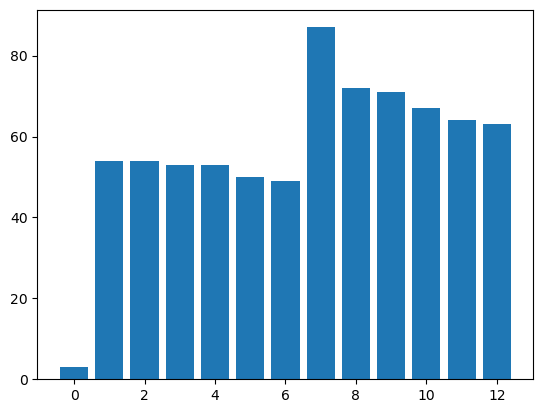

In [39]:
plt.bar(x=absentee_data_pd.Month_of_absence.unique(), height=absentee_data_pd.Month_of_absence.value_counts())

<BarContainer object of 28 artists>

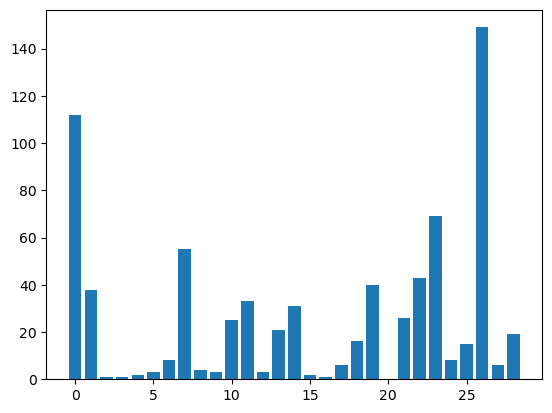

In [41]:
plt.bar(x=absentee_data_pd.Reason_for_absence.unique(), height=absentee_data_pd.Reason_for_absence.value_counts())

<BarContainer object of 4 artists>

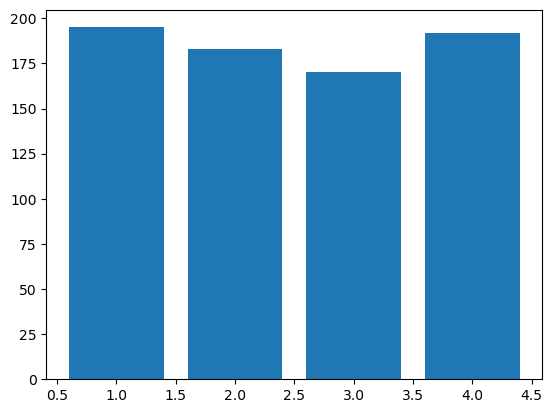

In [43]:
plt.bar(x=absentee_data_pd.Seasons.unique(), height=absentee_data_pd.Seasons.value_counts())

In [7]:
absentee_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

### Summary Statistics About Our Variables

In [13]:
absentee_data_pd.describe()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [33]:
absentee_data_pd.ID.nunique()

36

In [35]:
absentee_data_pd.Reason_for_absence.value_counts()

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: Reason_for_absence, dtype: int64

In [20]:
absentee_data_pd.ID.value_counts()

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
9       8
6       8
23      8
27      7
12      7
30      7
2       6
7       6
26      5
32      5
29      5
19      3
21      3
31      3
8       2
16      2
4       1
35      1
Name: ID, dtype: int64

We can now convert `absentee_data_pd` to a Spark SQL dataframe. We will save this as `absentee_spark_df`.

In [5]:
absentee_spark_df = spark.createDataFrame(absentee_data_pd)
absentee_spark_df.show(5)

/usr/local/spark/python/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/usr/local/spark/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+---------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| ID|Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time|Age|Work load Average/day|Hit target|Disciplinary failure|Education|Son|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|
+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+---------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| 11|                26|               7|              3|      1|                   289|                           

#### Formatting Column Names  

The original dataset contains variable names with spaces. To make things easier let's replace the spaces in any of the column names with `_` to prevent issues that might arise from the spaces being present in our names. First, we will simply create a list where we have replaced any space in a column name with an underscore. We will then use this list

In [6]:
new_columns = list(map(lambda item : item.replace(" ","_"),absentee_spark_df.columns))
print(new_columns)

['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Work_load_Average/day', 'Hit_target', 'Disciplinary_failure', 'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index', 'Absenteeism_time_in_hours']


In [7]:
from functools import reduce

absentee_data = reduce(lambda data, column_name: data.withColumnRenamed(absentee_spark_df.columns[column_name], new_columns[column_name]), range(len(absentee_spark_df.columns)), absentee_spark_df)
absentee_data = absentee_data.withColumnRenamed("Work_load_Average/day", "Workload_per_day")
absentee_data.printSchema()

root
 |-- ID: long (nullable = true)
 |-- Reason_for_absence: long (nullable = true)
 |-- Month_of_absence: long (nullable = true)
 |-- Day_of_the_week: long (nullable = true)
 |-- Seasons: long (nullable = true)
 |-- Transportation_expense: long (nullable = true)
 |-- Distance_from_Residence_to_Work: long (nullable = true)
 |-- Service_time: long (nullable = true)
 |-- Age: long (nullable = true)
 |-- Workload_per_day: double (nullable = true)
 |-- Hit_target: long (nullable = true)
 |-- Disciplinary_failure: long (nullable = true)
 |-- Education: long (nullable = true)
 |-- Son: long (nullable = true)
 |-- Social_drinker: long (nullable = true)
 |-- Social_smoker: long (nullable = true)
 |-- Pet: long (nullable = true)
 |-- Weight: long (nullable = true)
 |-- Height: long (nullable = true)
 |-- Body_mass_index: long (nullable = true)
 |-- Absenteeism_time_in_hours: long (nullable = true)



In [59]:
absentee_data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,740,18.017567567567568,11.021247263063655,1,36
Reason_for_absence,740,19.216216216216218,8.433405882799654,0,28
Month_of_absence,740,6.324324324324325,3.4362869319125893,0,12
Day_of_the_week,740,3.9148648648648647,1.4216747097562803,2,6
Seasons,740,2.5445945945945945,1.111831060157382,1,4
Transportation_expense,740,221.32972972972973,66.95222324531973,118,388
Distance_from_Residence_to_Work,740,29.63108108108108,14.836788436739145,5,52
Service_time,740,12.554054054054054,4.384873407621149,1,29
Age,740,36.45,6.47877245761187,27,58


# Splitting the Data, Metrics, and Models  

## Model Metrics

## Splitting the Data into Training and Test Sets   

The goal of creating our supervised models is to be able to successfully predict the number of absentee hours on new data, that is, on data that was not used to train our model. We want our model to be able to generalize to new data. In order to build a model that will be able to generalize we must be careful to not overfit our model to the data used to build it. If we build a model that is perfect at predicting our response variable based on data that was used to build the model, but largely fails to predict our response variable when new data is used to generate predictions, it is clear to see that our model will not be very useful. 

One common way to combat the problem of overfitting our model is to split the data into a training set and a test set. The exact split to use for a training vs test set can vary, but it is common to see an 80/20 or 70/30 training vs test set split. Once the data has been split into training and test sets we can use the training set to fit our model. Often we will want to use model metrics to evaluate the predictions produced by our model based on the observations contained in our training set that were used to fit that model.  

Now, let's split our data into training and test sets.  We can do this by using the `.randomSplit()` method on our spark SQL data frame.

In [8]:
train, test = absentee_data.randomSplit([0.8,0.2], seed = 1234)
print(train.count(), test.count())

581 159


## Models  

Statistical learning is used for inference, prediction, classification, and pattern finding based on your data. A statistical learning model is a mathematical representation of some phenomenon on which data has been observed and collected. We will built 5 different classes of supervised statistical learning models to predict the value of our response variable, the number of absentee hours. In this section we will briefly discuss the concepts and ideas involved in each of our five classes of models. In the next section, [Model Fitting Using Spark MLlib](#Model-Fitting-Using-Spark-MLlib), we will build and fit our models on the training data set.

### Model 1  - Multiple Linear Regression  

Resource for polynomial expansion:
https://george-jen.gitbook.io/data-science-and-apache-spark/polynomialexpansion  



### Model 2  - Regression Tree

### Model 3 - Random Forest 

### Model 4  - Gradient Boosted Regression Tree   

### Model 5 - LASSO Regression    

# Model Fitting Using Spark MLlib and `CrossValidation()`

We will be using cross-validation for model selection and hyperparameter tuning.  

First, let's import the required libraries and functions that we will need to build our models. These will be used in all models, additional libraries or functions that are needed for specific models will be imported as needed within each model section.

In [9]:
from pyspark.ml.feature import SQLTransformer, VectorAssembler, StandardScaler, OneHotEncoder
from pyspark.sql.functions import *
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

### Transformations and Preprocessing Using `MLlib` Functions  

The transformations in this section will be used in one or more of our model pipelines.

#### `sql_trans_label` Selecting Variables for Modeling and Creating Label Column  

The `sql_trans_label` transformation uses `SQLTransformer()` to create the `label` column in our data set. We will also select only the variables that we want to include when building our models. We will drop the variables below from our dataset:

-  `ID` - This is a personal identifier of each employee. As we are concerned with predicting the number of absentee hours for a given instance, `ID` will not be needed to build our model.  
-  `Body_mass_index` - We will drop this variable as it is a function of height and weight, and is highly correlated with both.  
-  `Month_of_absence` - We will drop this variable because it contains similar information to the `Seasons` variable, with many additional levels as compared to the `Seasons` variable.  

In [10]:
sql_trans_label = SQLTransformer(
    statement = """
                SELECT Reason_for_absence, Day_of_the_week, Seasons, Transportation_expense, Distance_from_Residence_to_Work, Service_time, \
                Age, Workload_per_day, Hit_target, Disciplinary_failure, Education, Son, Social_drinker, Social_smoker, Pet, Weight, \
                Height, Absenteeism_time_in_hours AS label FROM __THIS__
                """
)

Let's just do a quick check that this works as expected. We will use `.toPandas()` to display the data frame as a pandas dataframe. This will not change the `absentee_data` dataframe.

In [11]:
sql_trans_label.transform(absentee_data).columns

['Reason_for_absence',
 'Day_of_the_week',
 'Seasons',
 'Transportation_expense',
 'Distance_from_Residence_to_Work',
 'Service_time',
 'Age',
 'Workload_per_day',
 'Hit_target',
 'Disciplinary_failure',
 'Education',
 'Son',
 'Social_drinker',
 'Social_smoker',
 'Pet',
 'Weight',
 'Height',
 'label']

#### `scale_trans` Standardizing Numeric Variables  

It is important that we standardize our numeric variables before building our models. Some of the predictor variables that we are using have different units and very different scales, such as `Transporation_expense` with a maximum value of `388` compared to `Son` (number of children) with a maximum value of `4`.  The variables the we will standardize are:  

-  `Transportation_expense` - The standardized version will be called `Transportaion_expense_scaled`  
-  `Distance_from_Residence_to_Work` The standardized version will be called `Distance_from_Residence_to_Work_scaled`  
-  `Service_time` The standardized version will be called `Service_time_scaled`  
-  `Age` The standardized version will be called `Age_scaled`  
-  `Workload_per_day` The standardized version will be called `Workload_per_day_scaled`
-  `Hit_target` The standardized version will be called `Hit_target_scaled`  
-  `Son` The standardized version will be called `Son_scaled`  
-  `Pet` The standardized version will be called `Pet_scaled`  
-  `Weight` The standardized version will be called `Weight_scaled`  
-  `Height` The standardized version will be called `Height_scaled`  

*Note that we will add these to our data frame without removing the original variables*

https://www.analyticsvidhya.com/blog/2022/06/building-a-machine-learning-pipeline-using-pyspark/

In [12]:
# Creating a list of numeric column names that we want to scale
numeric_cols = ['Transportation_expense', 'Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Workload_per_day', \
                                    'Hit_target', 'Son', 'Pet', 'Weight', 'Height']
assembler = [VectorAssembler(inputCols=[col], outputCol=col+'_vec') for col in numeric_cols]
scale = [StandardScaler(inputCol=col+'_vec', outputCol=col+'_scaled', withMean=True, withStd=True) for col in numeric_cols]
scale_pipe = Pipeline(stages = assembler + scale)
scale_trans = scale_pipe.fit(absentee_data)
scale_trans.transform(absentee_data).columns

['ID',
 'Reason_for_absence',
 'Month_of_absence',
 'Day_of_the_week',
 'Seasons',
 'Transportation_expense',
 'Distance_from_Residence_to_Work',
 'Service_time',
 'Age',
 'Workload_per_day',
 'Hit_target',
 'Disciplinary_failure',
 'Education',
 'Son',
 'Social_drinker',
 'Social_smoker',
 'Pet',
 'Weight',
 'Height',
 'Body_mass_index',
 'Absenteeism_time_in_hours',
 'Transportation_expense_vec',
 'Distance_from_Residence_to_Work_vec',
 'Service_time_vec',
 'Age_vec',
 'Workload_per_day_vec',
 'Hit_target_vec',
 'Son_vec',
 'Pet_vec',
 'Weight_vec',
 'Height_vec',
 'Transportation_expense_scaled',
 'Distance_from_Residence_to_Work_scaled',
 'Service_time_scaled',
 'Age_scaled',
 'Workload_per_day_scaled',
 'Hit_target_scaled',
 'Son_scaled',
 'Pet_scaled',
 'Weight_scaled',
 'Height_scaled']

#### `encoder_trans` Creating Dummy Variables for Categorical Variables in the Dataset  

Before we build our models we want to create dummy variables for the non-binary categorical variables in our dataset. We will use `OneHotEncoder()` from `MLlib` to create these dummy variables for us. We will create dummy variables for:  
-  `Reason_for_absence` - The encoded reason for absence variable will be called `Reason_onehot`    
-  `Day_of_the_week` - The encoded day of the week variable will be called `Day_onehot`  
-  `Seasons` - The encoded seasons variable will be called `Season_onehot`  

*Note that we will add these to our data frame without removing the original variables*

In [13]:
# Create our encoder instance and save as onehot_encoder
onehot_encoder = OneHotEncoder(inputCols=['Reason_for_absence', 'Day_of_the_week', 'Seasons'],
                               outputCols=['Reason_onehot', 'Day_onehot', 'Season_onehot'])

# Fit our encoder instance on our data frame and save it as encoder_transform
encoder_trans = onehot_encoder.fit(absentee_data)

# Test encoder_model by transforming our absentee_data and save as encoded
encoded = encoder_trans.transform(absentee_data)

# Check that everything looks as expected using the action .show()
encoded.show()

+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+---------------+-------------+-------------+
| ID|Reason_for_absence|Month_of_absence|Day_of_the_week|Seasons|Transportation_expense|Distance_from_Residence_to_Work|Service_time|Age|Workload_per_day|Hit_target|Disciplinary_failure|Education|Son|Social_drinker|Social_smoker|Pet|Weight|Height|Body_mass_index|Absenteeism_time_in_hours|  Reason_onehot|   Day_onehot|Season_onehot|
+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+---------------+-------------+-------------

#### Vector Assemblers  

The `vectorAssembler` will create a features vector containing all predictor variables that we want to use in our linear and KNN models that will used scaled data in addition to the one hot encoded variables and a couple of unchanged variables from our dataset. We will call this vector assembler `features_Assembler`. We need to pass these variable names as a list. To easiliy grab the columns we want we can use the `.columns` attribute on our spark SQL data frames to return a list of column names. We can then copy and paste the variables we want to include in our `features` column. We will include the variables:  

`Transportation_expense_scaled`, `Distance_from_Residence_to_Work_scaled`, `Service_time_scaled`, `Age_scaled`, `Workload_per_day_scaled`, `Hit_target_scaled`, `Son_scaled`, `Pet_scaled`, `Weight_scaled`, `Height_scaled`, `Reason_onehot`, `Day_onehot`, `Season_onehot`, `Disciplinary_failure`, `Education`, `Social_drinker`, and`Social_smoker`.

We will create a separate vector assembler to use with our tree models called `tree_features_assembler` and include the factors: 

`Transportation_expense`, `Distance_from_Residence_to_Work`, `Service_time`, `Age`, `Workload_per_day`, `Hit_target`, `Disciplinary_failure`, `Education`, `Son`, `Social_drinker`, `Social_smoker`, `Pet`, `Weight`, `Height`, `Reason_onehot`, `Day_onehot`, `Season_onehot`

In [14]:
print(scale_trans.transform(absentee_data).columns)

['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Workload_per_day', 'Hit_target', 'Disciplinary_failure', 'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index', 'Absenteeism_time_in_hours', 'Transportation_expense_vec', 'Distance_from_Residence_to_Work_vec', 'Service_time_vec', 'Age_vec', 'Workload_per_day_vec', 'Hit_target_vec', 'Son_vec', 'Pet_vec', 'Weight_vec', 'Height_vec', 'Transportation_expense_scaled', 'Distance_from_Residence_to_Work_scaled', 'Service_time_scaled', 'Age_scaled', 'Workload_per_day_scaled', 'Hit_target_scaled', 'Son_scaled', 'Pet_scaled', 'Weight_scaled', 'Height_scaled']


In [15]:
print(encoded.columns)

['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Workload_per_day', 'Hit_target', 'Disciplinary_failure', 'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index', 'Absenteeism_time_in_hours', 'Reason_onehot', 'Day_onehot', 'Season_onehot']


In [16]:
absentee_data.columns

['ID',
 'Reason_for_absence',
 'Month_of_absence',
 'Day_of_the_week',
 'Seasons',
 'Transportation_expense',
 'Distance_from_Residence_to_Work',
 'Service_time',
 'Age',
 'Workload_per_day',
 'Hit_target',
 'Disciplinary_failure',
 'Education',
 'Son',
 'Social_drinker',
 'Social_smoker',
 'Pet',
 'Weight',
 'Height',
 'Body_mass_index',
 'Absenteeism_time_in_hours']

In [17]:
features_Assembler = VectorAssembler(inputCols = ['Transportation_expense_scaled', 'Distance_from_Residence_to_Work_scaled', 'Service_time_scaled', \
                                                        'Age_scaled', 'Workload_per_day_scaled', 'Hit_target_scaled', 'Son_scaled', 'Pet_scaled', \
                                                        'Weight_scaled', 'Height_scaled', 'Reason_onehot', 'Day_onehot', 'Season_onehot',  \
                                                        'Disciplinary_failure', 'Education', 'Social_drinker', 'Social_smoker'], 
                                  outputCol = 'features')

In [18]:
tree_features_Assembler = VectorAssembler(inputCols = ['Reason_onehot', 'Day_onehot', 'Season_onehot', 'Transportation_expense', \
                                                       'Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Workload_per_day', \
                                                       'Hit_target', 'Disciplinary_failure', 'Education', 'Son', 'Social_drinker', \
                                                       'Social_smoker', 'Pet', 'Weight', 'Height'], 
                                  outputCol = 'features')

In [92]:
#create a feature array by omitting the last column
feature_cols = absentee_data.columns[:-1]
vect_assembler = VectorAssembler(inputCols = feature_cols, outputCol="features")
#Utilize Assembler created above in order to add the feature column
data_w_features = vect_assembler.transform(absentee_data)
data_w_features.show()

+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+--------------------+
| ID|Reason_for_absence|Month_of_absence|Day_of_the_week|Seasons|Transportation_expense|Distance_from_Residence_to_Work|Service_time|Age|Workload_per_day|Hit_target|Disciplinary_failure|Education|Son|Social_drinker|Social_smoker|Pet|Weight|Height|Body_mass_index|Absenteeism_time_in_hours|            features|
+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+--------------------+
| 11|                26|               7|              3|      1|  

### Model 1  - Multiple Linear Regression  

We will use `LinearRegression` from `pyspark.ml.regression` for our MLR model. The parameters available allow for various types of regularization, including none (ordinary least squares), Ridge Regression, Lasso, and Elastic Net. The `regParam` represents the $\lambda$ in the penalty part of the loss function (`elasticNetParam` range of 0 to 1). The series of transformations that we will use in our MLR pipeline are:  

1. `sqlTransLabel` - To select the columns of interest from our original data frame and to create our `label` column for our target variable, `Absenteeism_time_in_hours`.  
2.  `df_scale` - To standardize our numeric columns.  
3.  `encoder_model` To create one hot encoded versions of our categorical variables.  
4.  `features_Assembler` To put all of our desired predictor variables into our `features` vector.  
5.  `mlr_regressor` To create our MLR model.  

In [19]:
# Importing LinearRegression
from pyspark.ml.regression import LinearRegression

In [20]:
# Creating mlr regressor instance for pipeline
mlr_regressor = LinearRegression(featuresCol = 'features', labelCol='label')

In [21]:
# Creating mlr pipeline 
mlr_pipeline = Pipeline(stages = [sql_trans_label, scale_trans, encoder_trans, features_Assembler, mlr_regressor])

# Creating mlr param grid for cross validation
mlr_paramGrid = ParamGridBuilder() \
    .addGrid(mlr_regressor.regParam, [0, 0.01, 0.04, 0.07, 0.1, 0.5, 1.0, 5.0, 10.0]) \
    .addGrid(mlr_regressor.elasticNetParam, [0.0, 0.2, 0.5, 0.7, 1.0]) \
    .build()

In [28]:
# Creating mlr param grid for cross validation
test_paramGrid = ParamGridBuilder() \
    .addGrid(mlr_regressor.regParam, [0, 0.01, 0.1, 0.5, 1.0, 10.0]) \
    .addGrid(mlr_regressor.elasticNetParam, [0.0, 0.2, 0.5, 0.7, 1.0]) \
    .build()

In [29]:
# Creating mlr crossvalidator using the mlr_pipleline, mlr_paramgrid, and using RMSE as our metric
test_crossval = CrossValidator(estimator = mlr_pipeline,
                              estimatorParamMaps = test_paramGrid,
                              evaluator = RegressionEvaluator(metricName='rmse'),
                              numFolds=5,
                              seed = 1234)

In [30]:
# Fitting model using the mlr cross validator that we created
test_cv_model = test_crossval.fit(train)

In [31]:
# MLR model stats
test_Pipeline = test_cv_model.bestModel
test_Model = test_Pipeline.stages[4]
print(f"Best MLR Training RMSE: {test_Model.summary.rootMeanSquaredError}")
print(f"Best MLR Training MAE: {test_Model.summary.meanAbsoluteError}")
print(test_Model.explainParam('regParam'))
print(test_Model.explainParam('elasticNetParam'))

Best MLR Training RMSE: 11.923348668556022
Best MLR Training MAE: 5.102668265393188
regParam: regularization parameter (>= 0). (default: 0.0, current: 10.0)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0, current: 0.0)


In [22]:
# Creating mlr param grid for cross validation
mlr_paramGrid = ParamGridBuilder() \
    .addGrid(mlr_regressor.regParam, [0, 0.01, 0.1, 1.0, 10.0]) \
    .addGrid(mlr_regressor.elasticNetParam, [0.0, 0.2, 0.5, 0.7, 1.0]) \
    .build()

Next, we will create our MLR crossvalidator, `mlr_crossval`, using the `mlr_pipeline`, `mlr_paramgrid`, and using RMSE as our metric.  

In [23]:
# Creating mlr crossvalidator using the mlr_pipleline, mlr_paramgrid, and using RMSE as our metric
mlr_crossval = CrossValidator(estimator = mlr_pipeline,
                              estimatorParamMaps = mlr_paramGrid,
                              evaluator = RegressionEvaluator(metricName='rmse'),
                              numFolds=5,
                              seed = 1234)

We can now fit our model on our `train` data set using `mlr_crossval`. This will automatically select the optimal values for our `regParam` and `elasticNetParam` parameters. We will save this as `mlr_cv_model`.

# Creating mlr param grid for cross validation RIDGE
mlr_test_paramGrid = ParamGridBuilder() \
    .addGrid(mlr_regressor.regParam, [0, 0.5]) \
    .addGrid(mlr_regressor.elasticNetParam, [0.0, 1.0]) \
    .build()

# Creating mlr crossvalidator using the mlr_pipleline, mlr_paramgrid, and using RMSE as our metric
mlr_test_crossval = CrossValidator(estimator = mlr_pipeline,
                              estimatorParamMaps = mlr_test_paramGrid,
                              evaluator = RegressionEvaluator(metricName='rmse'),
                              numFolds=5,
                              seed = 1234)

# Fitting model using the mlr cross validator that we created
mlr_test_cv_model = mlr_test_crossval.fit(train)

In [24]:
# Fitting model using the mlr cross validator that we created
mlr_cv_model = mlr_crossval.fit(train)

# MLR model stats
best_mlr_Pipeline = mlr_test_cv_model.bestModel
best_mlr_Model = best_mlr_Pipeline.stages[4]
print(f"Best MLR Training RMSE: {best_mlr_Model.summary.rootMeanSquaredError}")
print(f"Best MLR Training MAE: {best_mlr_Model.summary.meanAbsoluteError}")
print(best_mlr_Model.explainParam('elasticNetParam'))
print(best_mlr_Model.explainParam('regParam'))

In [25]:
# MLR model stats
best_mlr_Pipeline = mlr_cv_model.bestModel
best_mlr_Model = best_mlr_Pipeline.stages[4]
print(f"Best MLR Training RMSE: {best_mlr_Model.summary.rootMeanSquaredError}")
print(f"Best MLR Training MAE: {best_mlr_Model.summary.meanAbsoluteError}")
print(best_mlr_Model.explainParam('regParam'))
print(best_mlr_Model.explainParam('elasticNetParam'))

Best MLR Training RMSE: 11.923348668556022
Best MLR Training MAE: 5.102668265393188
regParam: regularization parameter (>= 0). (default: 0.0, current: 10.0)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0, current: 0.0)


Next, we will run cross validation using MAE as our metric and see if both cross validators return the same model, or if different models were selected.

In [199]:
# Creating mlr mae crossvalidator using the mlr_pipleline, mlr_paramgrid, and using RMSE as our metric
mlr_mae_crossval = CrossValidator(estimator = mlr_pipeline,
                              estimatorParamMaps = mlr_paramGrid,
                              evaluator = RegressionEvaluator(metricName='mae'),
                              numFolds=5,
                              seed = 1234)

In [200]:
# Fitting model using the mlr mae cross validator that we created
mlr_mae_cv_model = mlr_mae_crossval.fit(train)

In [242]:
# MLR mae model params
best_mlr_mae_Pipeline = mlr_mae_cv_model.bestModel
best_mlr_mae_Model = best_mlr_mae_Pipeline.stages[4]
print(f"Best MLR Training RMSE: {best_mlr_mae_Model.summary.rootMeanSquaredError}")
print(f"Best MLR Training MAE: {best_mlr_mae_Model.summary.meanAbsoluteError}")
print(best_mlr_mae_Model.explainParam('elasticNetParam'))
print(best_mlr_mae_Model.explainParam('regParam'))

Best MLR Training RMSE: 11.923348668556022
Best MLR Training MAE: 5.102668265393188
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0, current: 0.0)
regParam: regularization parameter (>= 0). (default: 0.0, current: 10.0)


Using RMSE and MAE in cross-validation ended up selecting the same model, with a value of `0` for the `elasticNetParam` and a value of `10` for the `regParam`.

#### Evaluating CV Selected Model on Training Set  

`LinearRegression` in `MLlib` makes it easy to find the training RMSE and MAE values when we use this in cross validation. The fitted linear regression model has an attribute, `summary` that will allow you to easiliy access statistics on residuals, MSE and r-squared values for your fitted model. We will use this to print our values for RMSE and MAE for our training set.  

In [238]:
print(f"Best MLR Training RMSE: {best_mlr_Model.summary.rootMeanSquaredError}")
print(f"Best MLR Training MAE: {best_mlr_Model.summary.meanAbsoluteError}")

Best MLR Training RMSE: 11.923348668556022
Best MLR Training MAE: 5.102668265393188


### Model 2  - Regression Tree  

One benefit of regression trees is that there is not a need to scale the predictors in the model. As a result, we do not need to include this transformation in our regression tree pipeline. We still want to use our onehot encoder transformation to create dummy variables for the categorical variables in our model. We will use the `tree_features_Assembler` that we created above to create our features vector for our regression trees. We will be using `DecisionTreeRegressor` from `MLLib` for our model fitting.  

In [173]:
from pyspark.ml.regression import DecisionTreeRegressor

In [174]:
# Creating regression tree regressor instance for pipeline
single_tree_regressor = DecisionTreeRegressor(featuresCol = 'features', labelCol='label')

In [183]:
# Creating single regression tree pipeline 
single_tree_pipeline = Pipeline(stages = [sql_trans_label, encoder_trans, tree_features_Assembler, single_tree_regressor])

In [184]:
# Creating single regression tree param grid for cross validation
single_tree_paramGrid = ParamGridBuilder() \
    .addGrid(single_tree_regressor.maxDepth, range(2,15)) \
    .addGrid(single_tree_regressor.minInstancesPerNode, [3, 5, 10, 50, 100]) \
    .build()

In [185]:
# Creating single regression tree crossvalidator using the single_tree_pipleline, single_tree_paramgrid, and using RMSE as our metric
single_tree_crossval = CrossValidator(estimator = single_tree_pipeline,
                              estimatorParamMaps = single_tree_paramGrid,
                              evaluator = RegressionEvaluator(metricName='rmse'),
                              numFolds=5,
                              seed = 1234)

In [206]:
# Fitting model using the single tree cross validator that we created
single_tree_cv_model = single_tree_crossval.fit(train)

In [288]:
# Single Regression Tree model stats
best_single_tree_Pipeline = single_tree_cv_model.bestModel
best_single_tree_Model = best_single_tree_Pipeline.stages[3]
print(best_single_tree_Model.explainParam('maxDepth'))
print(best_single_tree_Model.explainParam('minInstancesPerNode'))

maxDepth: Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. Must be in range [0, 30]. (default: 5, current: 2)
minInstancesPerNode: Minimum number of instances each child must have after split. If a split causes the left or right child to have fewer than minInstancesPerNode, the split will be discarded as invalid. Should be >= 1. (default: 1, current: 10)


In [207]:
# Creating single regression tree mae crossvalidator using the single_tree_pipleline, single_tree_paramgrid, and using RMSE as our metric
single_tree_mae_crossval = CrossValidator(estimator = single_tree_pipeline,
                              estimatorParamMaps = single_tree_paramGrid,
                              evaluator = RegressionEvaluator(metricName='mae'),
                              numFolds=5,
                              seed = 1234)

In [290]:
best_single_tree_mae_Model.featureImportances

SparseVector(52, {0: 0.0108, 1: 0.0118, 7: 0.0121, 9: 0.0878, 10: 0.0038, 11: 0.0027, 12: 0.0341, 13: 0.0855, 14: 0.0126, 18: 0.0027, 19: 0.1141, 22: 0.0042, 23: 0.0027, 26: 0.004, 30: 0.0562, 32: 0.0037, 33: 0.0009, 35: 0.0066, 36: 0.0018, 37: 0.0004, 38: 0.0724, 39: 0.0575, 40: 0.0372, 41: 0.097, 42: 0.081, 43: 0.0969, 45: 0.0005, 47: 0.0189, 49: 0.0477, 50: 0.002, 51: 0.0304})

In [295]:
best_single_tree_mae_Model.predictionCol

Param(parent='DecisionTreeRegressor_3ba32df1da1f', name='predictionCol', doc='prediction column name.')

In [210]:
# Fitting model using the single tree mae cross validator that we created
single_tree_mae_cv_model = single_tree_mae_crossval.fit(train)

In [289]:
# Single Regression Tree mae model stats
best_single_tree_mae_Pipeline = single_tree_mae_cv_model.bestModel
best_single_tree_mae_Model = best_single_tree_mae_Pipeline.stages[3]
print(best_single_tree_mae_Model.explainParam('maxDepth'))
print(best_single_tree_mae_Model.explainParam('minInstancesPerNode'))

maxDepth: Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. Must be in range [0, 30]. (default: 5, current: 13)
minInstancesPerNode: Minimum number of instances each child must have after split. If a split causes the left or right child to have fewer than minInstancesPerNode, the split will be discarded as invalid. Should be >= 1. (default: 1, current: 3)


Cross-validation using MAE and RMSE both selected a decision tree model with `13` for `maxDepth` and `3` for `minInstancesPerNode`, but this does not mean that the exact same models were slected. We can use `.toDebugString` to get a full description of each model.

In [302]:
print(f'RMSE CV regression tree model selected:\n\n{best_single_tree_Model.toDebugString}')

RMSE CV regression tree model selected:

DecisionTreeRegressionModel: uid=DecisionTreeRegressor_3ba32df1da1f, depth=2, numNodes=7, numFeatures=52
  If (feature 19 in {0.0})
   If (feature 13 in {0.0})
    Predict: 5.284
   Else (feature 13 not in {0.0})
    Predict: 15.708333333333334
  Else (feature 19 not in {0.0})
   If (feature 49 <= 1.5)
    Predict: 26.956521739130434
   Else (feature 49 > 1.5)
    Predict: 6.9



In [303]:
print(f'MAE CV regression tree model selected:\n\n{best_single_tree_mae_Model.toDebugString}')

MAE CV regression tree model selected:

DecisionTreeRegressionModel: uid=DecisionTreeRegressor_3ba32df1da1f, depth=13, numNodes=113, numFeatures=52
  If (feature 19 in {0.0})
   If (feature 9 in {0.0})
    If (feature 13 in {0.0})
     If (feature 12 in {0.0})
      If (feature 51 <= 190.5)
       If (feature 1 in {0.0})
        If (feature 0 in {1.0})
         Predict: 0.0
        Else (feature 0 not in {1.0})
         If (feature 38 <= 264.0)
          If (feature 26 in {0.0})
           If (feature 22 in {0.0})
            If (feature 10 in {0.0})
             If (feature 18 in {0.0})
              If (feature 11 in {0.0})
               Predict: 2.9423076923076925
              Else (feature 11 not in {0.0})
               Predict: 6.117647058823529
             Else (feature 18 not in {0.0})
              If (feature 32 in {1.0})
               Predict: 4.0
              Else (feature 32 not in {1.0})
               Predict: 7.5
            Else (feature 10 not in {0.0})
         

When we look at the full model descriptions we can see that the model selected via mean absolute error is much more complex than what was selected using RMSE. To avoid overfitting our single regression tree model to our training set, we will use the model selected using RMSE during cross validation.

#### Evaluating CV Selected Model on Training Set  

Unfortunately, the `DecisionTreeRegerssionModel` in `MLlib` does not have the `summary` attribute, so we need a few steps to print the RMSE and MAE for our training set. We will use `RegressionEvaluator` to help get these values.

In [286]:
srt_train = single_tree_cv_model.transform(train)

In [308]:
# We can use regression_eval for all of our regression evaluators going forward
regression_eval = RegressionEvaluator(labelCol = 'label')
srt_train_rmse = regression_eval.evaluate(srt_train, {regression_eval.metricName:'rmse'})
srt_train_mae = regression_eval.evaluate(srt_train,{regression_eval.metricName:'mae'})

print(f"Single Regression Tree Training  RMSE: {srt_train_rmse}")
print(f"Single Regression Tree Training MAE: {srt_train_mae}")

Single Regression Tree Training  RMSE: 12.65437854521456
Single Regression Tree Training MAE: 5.7784469056349606


In [ ]:
mae_train = single_tree_mae_cv_model.transform(train)

In [285]:
# We can use regression_eval for all of our regression evaluators going forward

mae_train_rmse = regression_eval.evaluate(mae_train, {regression_eval.metricName:'rmse'})
mae_train_mae = regression_eval.evaluate(mae_train,{regression_eval.metricName:'mae'})

print(f"Random Forest Training  RMSE: {mae_train_rmse}")
print(f"Random Forest Training MAE: {mae_train_mae}")

Random Forest Training  RMSE: 9.137616588905082
Random Forest Training MAE: 3.422409381041743


So, we can see that our single tree regression model performed slightly worse than our penalized MLR model on our training set. However, we really want to compare model performace on the test set, which we will do in our [Model Testing](#Model-Testing) section.

### Model 3 - Random Forest  

We will use the same set of transformations on in our random forest pipeline as we did with our single regression tree pipeline, this time using the `RandomForestRegressor` as our last stage in the pipeline. 

In [212]:
from pyspark.ml.regression import RandomForestRegressor

In [213]:
# Creating random forest regressor instance for pipeline
rf_regressor = RandomForestRegressor(featuresCol = 'features', labelCol='label')

In [214]:
# Creating random forest pipeline using all_vars_vectorAssembler and rf_regressor
rf_pipeline = Pipeline(stages = [sql_trans_label, encoder_trans, tree_features_Assembler, rf_regressor])

#### Parameters for Random Forest Model  

There are several possible parameters available for a building the random forest model using `RandomForestRegressor()`. We will specify values/possible values for three parameters, `numTrees`, `featureSubsetStrategy`, and `maxDepth`.  

1.  The `numTrees` parameter - This parameter has a default value of `20` trees. By increasing this value we can bring down the variance in our model as compared to the single regression tree. We will set this value to `100` for our models.  
2.  The `featureSubsetStrategy` parameter - This parameter is the number of features to consider for splits at each tree mode.  Possible values for this parameter are:
    - `auto` - When this parameter is set to `auto` the number of features will automatically be selected based on the number of trees and the type of model. Our model is a regression model with `100` trees, and as a result `onethird` would be selected automatically. Note that `auto` is the default value for `featureSubsetStrategy`.  
    - `all` - Use all features. If this is selected `RandomForestRegressor()` generates a bagged tree model as opposed to a random forest model.   
    - `onethird` - The number of features to consider for splits at each tree node will be the total number of features in our model divided by three.  This is usually used for regression problems.  
    - `sqrt` - This will use the square root of the number of features for the number of features to consider. This is usually used for classification problems.  
    - `log2` - 
3.  The `maxDepth` parameter - This is the value for the maximum depth of the tree, and can have values ranging from `0` to `30`, with a default value of `5`. The possible values of `maxDepth` that we will use during model selection are `5`, `10`, `15`, `20`, and `25`.  

In [248]:
# Creating param grid for cross validation
rf_paramGrid = ParamGridBuilder() \
    .addGrid(rf_regressor.numTrees, [100]) \
    .addGrid(rf_regressor.featureSubsetStrategy, ['all', 'onethird', 'sqrt', 'log2']) \
    .addGrid(rf_regressor.maxDepth, [5, 10, 15, 20, 25]) \
    .build()

In [249]:
# Creating random forest crossvalidator
rf_crossval = CrossValidator(estimator = rf_pipeline,
                          estimatorParamMaps = rf_paramGrid,
                          evaluator = RegressionEvaluator(metricName='rmse'),
                          numFolds=5)

In [250]:
# Fitting model using the random forest cross validator that we created
rf_cv_model = rf_crossval.fit(train)

In [259]:
best_rf_Pipeline = rf_cv_model.bestModel
best_rf_Model = best_rf_Pipeline.stages[3]
print(f"Best Model Number of Trees: {best_rf_Model.getNumTrees}")
print(f"Best Model Max Depth: {best_rf_Model.getMaxDepth()}")
print(f"Best Model Feature Subset: {best_rf_Model.explainParam('featureSubsetStrategy')}")
print(f"Best Model Max Bins: {best_rf_Model.getMaxBins}")

Best Model Number of Trees: 100
Best Model Max Depth: 20
Best Model Feature Subset: featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 'n' (when n is in the range (0, 1.0], use n * number of features. When n is in the range (1, number of features), use n features). default = 'auto' (default: auto, current: log2)
Best Model Max Bins: <bound method _DecisionTreeParams.getMaxBins of RandomForestRegressionModel: uid=RandomForestRegressor_2dc50212df0a, numTrees=100, numFeatures=52>


In [260]:
# Creating random forest mae crossvalidator
rf_mae_crossval = CrossValidator(estimator = rf_pipeline,
                          estimatorParamMaps = rf_paramGrid,
                          evaluator = RegressionEvaluator(metricName='mae'),
                          numFolds=5)

In [261]:
# Fitting model using the random forest mae cross validator that we created
rf_mae_cv_model = rf_mae_crossval.fit(train)

In [263]:
best_rf_mae_Pipeline = rf_mae_cv_model.bestModel
best_rf_mae_Model = best_rf_mae_Pipeline.stages[3]
print(f"Best RF MAE Model Number of Trees: {best_rf_mae_Model.getNumTrees}")
print(f"Best RF MAE Model Max Depth: {best_rf_mae_Model.getMaxDepth()}")
print(f"Best RF MAE Model Feature Subset: {best_rf_mae_Model.explainParam('featureSubsetStrategy')}")
print(f"Best RF MAE Model Max Bins: {best_rf_mae_Model.getMaxBins}")

Best RF MAE Model Number of Trees: 100
Best RF MAE Model Max Depth: 25
Best RF MAE Model Feature Subset: featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 'n' (when n is in the range (0, 1.0], use n * number of features. When n is in the range (1, number of features), use n features). default = 'auto' (default: auto, current: sqrt)
Best RF MAE Model Max Bins: <bound method _DecisionTreeParams.getMaxBins of RandomForestRegressionModel: uid=RandomForestRegressor_2dc50212df0a, numTrees=100, numFeatures=52>


In [248]:
feature_list = ['ID',
 'Reason_for_absence',
 'Month_of_absence',
 'Day_of_the_week',
 'Seasons',
 'Transportation_expense',
 'Distance_from_Residence_to_Work',
 'Service_time',
 'Age',
 'Work_load_Average/day_',
 'Hit_target',
 'Disciplinary_failure',
 'Education',
 'Son',
 'Social_drinker',
 'Social_smoker',
 'Pet',
 'Weight',
 'Height',
 'Body_mass_index']

We can see that cross validation selected slightly different models based on RMSE vs MAE.  

- The RMSE model selected `log2` for the `featureSubsetStrategy` and `20` as the `maxDepth`  
- The MAE model selected `sqrt` for the `featureSubsetStrategy` and `25` as the `maxDepth`  

As discussed earlier, RMSE tends to penalize outliers more heavily than MAE. In this case, I want to build a model that will penalize outliers, so I will select the `rf_cv_model` that was selected based on best RMSE.

#### Evaluating CV Selected Model on Training Set  

Like the single regression tree, there are a couple of steps that we need to go through to get values for training RMSE and MAE. We will again use `RegressionEvaluator` to help get these values.

In [271]:
rf_train = rf_cv_model.transform(train)

Now, let's look at the training RMSE and MAE for the fitted random forest model.

In [272]:
rf_train_rmse = regression_eval.evaluate(rf_train, {regression_eval.metricName:'rmse'})
rf_train_mae = regression_eval.evaluate(rf_train,{regression_eval.metricName:'mae'})

print(f"Random Forest Training  RMSE: {rf_train_rmse}")
print(f"Random Forest Training MAE: {rf_train_mae}")

Random Forest Training  RMSE: 7.215500334169771
Random Forest Training MAE: 2.918472050488924


We can see that of the models so far, the random forest model that used MAE in cross-validation has performed the best on the training data. This gives us an idea of how our model performed at predictions based on data that were used to train the model. We are most concerned with how our models generalize to data not included in training the model, and in the  [Model Testing](#Model-Testing) section we will see how each of our models performs on new data in order to determine the best model overall.

### Model 4  - Gradient Boosted Regression Tree

In [46]:
from pyspark.ml.regression import GBTRegressor

# Model 5 - LASSO Regression Model  

We can fit a lasso regression model by using `LinearRegression` and specifying a value of `1` for the `ealsticNetParam`. We can then do cross validation using a range of penalties for the `regParam` parameter. For this model all basic transformations will be the same as those for the MLR model above. 

In [319]:
# Creating lasso regressor instance for pipeline
lasso_regressor = LinearRegression(featuresCol = 'features', labelCol='label')

In [320]:
# Creating lasso pipeline 
lasso_pipeline = Pipeline(stages = [sql_trans_label, scale_trans, encoder_trans, features_Assembler, lasso_regressor])

In [356]:
# Creating lasso param grid for cross validation - for LASSO eleasticNetParam should be set to 1
lasso_paramGrid = ParamGridBuilder() \
    .addGrid(lasso_regressor.regParam, [0.01, 0.04, 0.07, 0.1, 0.5, 1.0, 4.0, 6.0, 10.0, 15.0]) \
    .addGrid(lasso_regressor.elasticNetParam, [1.0]) \
    .build()

In [357]:
# Creating lasso crossvalidator using the lasso_pipleline, lasso_paramgrid, and using RMSE as our metric
lasso_crossval = CrossValidator(estimator = lasso_pipeline,
                                estimatorParamMaps = lasso_paramGrid,
                                evaluator = RegressionEvaluator(metricName='rmse'),
                                numFolds=5,
                                seed = 1234)

In [358]:
# Fitting model using the lasso cross validator that we created
lasso_cv_model = lasso_crossval.fit(train)

In [359]:
# Lasso model stats
best_lasso_Pipeline = lasso_cv_model.bestModel
best_lasso_Model = best_lasso_Pipeline.stages[4]
print(f"Best LASSO Training RMSE: {best_lasso_Model.summary.rootMeanSquaredError}")
print(f"Best LASSO Training MAE: {best_lasso_Model.summary.meanAbsoluteError}")
print(best_lasso_Model.explainParam('regParam'))

Best LASSO Training RMSE: 11.797258366364725
Best LASSO Training MAE: 5.190713596525649
regParam: regularization parameter (>= 0). (default: 0.0, current: 0.5)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0, current: 1.0)


In [360]:
# Creating lasso mae crossvalidator using the lasso_pipleline, lasso_paramgrid, and using MAE as our metric
lasso_mae_crossval = CrossValidator(estimator = lasso_pipeline,
                                    estimatorParamMaps = lasso_paramGrid,
                                    evaluator = RegressionEvaluator(metricName='mae'),
                                    numFolds=5,
                                    seed = 1234)

In [361]:
# Fitting model using the lasso mae cross validator that we created
lasso_mae_cv_model = lasso_mae_crossval.fit(train)

In [385]:
# Lasso mae model stats
best_lasso_mae_Pipeline = lasso_mae_cv_model.bestModel
best_lasso_mae_Model = best_lasso_mae_Pipeline.stages[4]
print(f"Best LASSO MAE Training RMSE: {best_lasso_mae_Model.summary.rootMeanSquaredError}")
print(f"Best LASSO MAE Training MAE: {best_lasso_mae_Model.summary.meanAbsoluteError}")
print(best_lasso_Model.explainParam('regParam'))

Best LASSO MAE Training RMSE: 11.797258366364725
Best LASSO MAE Training MAE: 5.190713596525649
regParam: regularization parameter (>= 0). (default: 0.0, current: 0.5)


Both RMSE and MAE cross validation selected a value of `0.5` for the `regParam` parameter. The resulting models produced were the same.

In [386]:
# MLR model stats
best_mlr_Pipeline = mlr_cv_model.bestModel
best_mlr_Model = best_mlr_Pipeline.stages[4]
print(f"Best MLR Training RMSE: {best_mlr_Model.summary.rootMeanSquaredError}")
print(f"Best MLR Training MAE: {best_mlr_Model.summary.meanAbsoluteError}")
print(best_mlr_Model.explainParam('elasticNetParam'))
print(best_mlr_Model.explainParam('regParam'))

Best MLR Training RMSE: 11.923348668556022
Best MLR Training MAE: 5.102668265393188
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0, current: 0.0)
regParam: regularization parameter (>= 0). (default: 0.0, current: 10.0)


### Model 5 - K Means Clustering Model  

In kNN it will again be important to scale our features before fitting our model. So, we will use a similar pipeline to the one used with the MLR model.

In [314]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [316]:
knn_regressor = KMeans(featuresCol = 'features')

In [318]:
# Creating knn pipeline 
knn_pipeline = Pipeline(stages = [sql_trans_label, scale_trans, encoder_trans, features_Assembler, knn_regressor])

In [ ]:
# Creating knn param grid for cross validation
mlr_paramGrid = ParamGridBuilder() \
    .addGrid(knn_regressor.k, [0, 0.01, 0.1, 1.0, 10.0]) \
    .addGrid(mlr_regressor.elasticNetParam, [0.0, 0.2, 0.5, 0.7, 1.0]) \
    .build()

# Model Testing  

In this section we will determine the best overall model for predicting the number of absentee hours.

### Model 1 - MLR 

In [254]:
# Using our fitted model from cross validation on our training set to get test error on our test set 
mlr_test_preds = mlr_cv_model.transform(test)

In [255]:
mlr_test_preds.toPandas()

,Reason_for_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Workload_per_day,Hit_target,Disciplinary_failure,...,Hit_target_scaled,Son_scaled,Pet_scaled,Weight_scaled,Height_scaled,Reason_onehot,Day_onehot,Season_onehot,features,prediction
0,23,5,1,235,11,14,37,205.917,92,0,...,[-0.6847376086068506],[-0.01722267458532133],[0.1927194812471385],[0.6958564295654857],[-0.01903313487507076],"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0)","(0.0, 1.0, 0.0, 0.0)","(0.2041794821387938, -1.2557354417042466, 0.32...",2.245120
1,28,6,1,235,29,12,48,205.917,92,0,...,[-0.6847376086068506],[-0.01722267458532133],[3.227026207265917],[0.6958564295654857],[-1.510335232144882],"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0)","(0.2041794821387938, -0.04253488440385048, -0....",4.214634
2,23,4,4,179,51,18,38,253.465,93,0,...,[-0.42013926376660554],[-0.9275640455237438],[-0.565857200257556],[0.7734768332251869],[-0.3504336009350288],"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0)","(0.0, 0.0, 0.0, 0.0)","(-0.6322378507824795, 1.4402657967410781, 1.24...",3.288878
3,19,3,1,235,20,13,43,241.476,92,0,...,[-0.6847376086068506],[-0.01722267458532133],[-0.565857200257556],[2.0930236954401074],[-0.8475343000249659],"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0)","(0.2041794821387938, -0.6491351630540485, 0.10...",15.190659
4,11,5,1,189,29,13,33,239.554,97,0,...,[0.6382541155943747],[0.8931186963531011],[0.9512961627518332],[-0.7789312399688372],[-0.8475343000249659],"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0)","(0.0, 1.0, 0.0, 0.0)","(-0.4828776127608235, -0.04253488440385048, 0....",7.503230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,27,6,3,179,26,9,30,275.089,96,0,...,[0.3736557707541297],[-0.9275640455237438],[-0.565857200257556],[-1.7879964875449528],[-0.18473336790504977],"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 1.0)","(-0.6322378507824795, -0.24473497728724983, -0...",2.889293
155,0,4,3,378,49,11,36,237.656,99,1,...,[1.1674508052748649],[0.8931186963531011],[2.4684495257612222],[-1.089412854607642],[0.3123673311848873],"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0)","(0.0, 0.0, 0.0, 1.0)","(2.3400308858484737, 1.305465734818812, -0.354...",2.435131
156,16,3,3,235,16,8,32,246.288,91,0,...,[-0.9493359534470958],[-0.9275640455237438],[-0.565857200257556],[-0.31320881801062994],[0.9751682633048033],"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 1.0)","(0.2041794821387938, -0.918735286898581, -1.03...",2.658337
157,8,6,1,118,10,10,37,275.089,96,0,...,[0.3736557707541297],[-0.9275640455237438],[-0.565857200257556],[0.30775441126697967],[-0.01903313487507076],"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0)","(-1.5433353027145806, -1.3231354726653797, -0....",4.984167


In [257]:
regression_eval = RegressionEvaluator(labelCol = 'label')
MLR_rmse = regression_eval.evaluate(mlr_test_preds, {regression_eval.metricName:'rmse'})
MLR_mae = regression_eval.evaluate(mlr_test_preds,{regression_eval.metricName:'mae'})

print(f"MLR RMSE: {MLR_rmse}")
print(f"MLR MAE: {MLR_mae}")

MLR RMSE: 11.819008749039375
MLR MAE: 5.132187387597737


### Model 2 - Regression Tree 

In [310]:
# Getting predictions for our test set based on the model selected using cv on our training set
srt_pred = single_tree_cv_model.transform(test)

In [311]:
srt_rmse = regression_eval.evaluate(srt_pred, {regression_eval.metricName:'rmse'})
srt_mae = regression_eval.evaluate(srt_pred,{regression_eval.metricName:'mae'})

print(f"Single Regression Tree TEST RMSE: {srt_rmse}")
print(f"Single Regression Tree TEST MAE: {srt_mae}")

Single Regression Tree TEST RMSE: 12.908941209175623
Single Regression Tree TEST MAE: 5.877636040470331


### Model 3 - Random Forest  

In [279]:
# Getting predictions for our test set based on the model selected using cv on our training set
rf_pred = rf_cv_model.transform(test)

In [93]:
rf_pred.toPandas()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,features,prediction
0,1,23,8,5,1,235,11,14,37,205.917,...,1,0,0,1,88,172,29,4,"[1.0, 23.0, 8.0, 5.0, 1.0, 235.0, 11.0, 14.0, ...",4.279018
1,2,28,8,6,1,235,29,12,48,205.917,...,1,0,1,5,88,163,33,8,"[2.0, 28.0, 8.0, 6.0, 1.0, 235.0, 29.0, 12.0, ...",3.643568
2,3,23,10,4,4,179,51,18,38,253.465,...,0,1,0,0,89,170,31,8,"[3.0, 23.0, 10.0, 4.0, 4.0, 179.0, 51.0, 18.0,...",2.788034
3,5,19,9,3,1,235,20,13,43,241.476,...,1,1,0,0,106,167,38,8,"[5.0, 19.0, 9.0, 3.0, 1.0, 235.0, 20.0, 13.0, ...",10.164765
4,6,11,7,5,1,189,29,13,33,239.554,...,2,0,0,2,69,167,25,8,"[6.0, 11.0, 7.0, 5.0, 1.0, 189.0, 29.0, 13.0, ...",10.189508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,22,27,6,6,3,179,26,9,30,275.089,...,0,0,0,0,56,171,19,2,"[22.0, 27.0, 6.0, 6.0, 3.0, 179.0, 26.0, 9.0, ...",3.231718
155,23,0,5,4,3,378,49,11,36,237.656,...,2,0,1,4,65,174,21,0,"[23.0, 0.0, 5.0, 4.0, 3.0, 378.0, 49.0, 11.0, ...",5.958150
156,25,16,4,3,3,235,16,8,32,246.288,...,0,0,0,0,75,178,25,3,"[25.0, 16.0, 4.0, 3.0, 3.0, 235.0, 16.0, 8.0, ...",9.400370
157,34,8,6,6,1,118,10,10,37,275.089,...,0,0,0,0,83,172,28,2,"[34.0, 8.0, 6.0, 6.0, 1.0, 118.0, 10.0, 10.0, ...",8.979252


In [307]:
rf_rmse = regression_eval.evaluate(rf_pred, {regression_eval.metricName:'rmse'})
rf_mae = regression_eval.evaluate(rf_pred,{regression_eval.metricName:'mae'})

print(f"Random Forest TEST RMSE: {rf_rmse}")
print(f"Random Forest TEST MAE: {rf_mae}")

Random Forest TEST RMSE: 12.447754472192184
Random Forest TEST MAE: 5.311814540444188


### Model 4 - Gradient Boosted Regression Tree   

### Model 5 - kNN